In [12]:
import tweepy
import pandas as pd
from dotenv import load_dotenv, dotenv_values

load_dotenv()
config = dotenv_values('../.env')

In [17]:
consumer_key = config['TWITTER_API_KEY'] 
consumer_secret = config['TWITTER_API_KEY_SECRET'] 
access_token = config['ACCESS_TOKEN'] 
access_token_secret = config['ACCESS_TOKEN_SECRET']

auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret, access_token, access_token_secret
)

consumer_key, consumer_secret, access_token, access_token_secret

('qL8Mlsne6IyrPwEMcLokjWGN0',
 '1hCBiSdVPGo4YJ2OVGgQMPfK689D0WQHZ9mI5sRi9sWrhNuF02',
 '892444846153236480-b7dxZjCzNcgc5svlLClsjo1HWN8yHMU',
 'jqRMDNSc4Bplq7WgEzpPj892l3KgrvZtOXV0KN94BzSQ5')

In [264]:
from typing import Optional
import requests

def get_tweet_text(tweet_id: str | int) -> Optional[dict]:
    response = requests.get(
        url=f"https://api.vxtwitter.com/Twitter/status/{tweet_id}")
    
    if response.status_code == 429:
        raise Exception("Rate limit exceeded. Please try again later.")
    elif not response.ok:
        print(f"Couldn't get tweet: {response.reason}")
        return
    
    try:
        return response.json()['text']
    except requests.JSONDecodeError:
        print("Couldn't decode response.")
        return

get_tweet_text(1723023015468753159)

'Throwback to my visit to the @_Jacobandco  store in Riyad with my dear friend Jacob Arabo. Wearing my Jacob & Co CR7 limited\xa0collection. https://t.co/d1zUztX3Ow'

In [20]:
norway_tbcov = pd.read_csv('../norway_tbcov/norway_tbcov.tsv', sep='\t', header=0, low_memory=False)

norway_tbcov

,tweet_id,date_time,lang,user_id,retweeted_id,quoted_id,in_reply_to_id,sentiment_conf,sentiment_label,user_type,...,user_profile_description_toponyms,user_profile_description_country_code,user_profile_description_state,user_profile_description_county,user_profile_description_city,tweet_text_toponyms,tweet_text_country_code,tweet_text_state,tweet_text_county,tweet_text_city
0,1223395571089727492,2020-02-01T00:00:08,en,2991789880,1.223357e+18,NaN,NaN,0.828,-1,UNK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1223396220133048320,2020-02-01T00:02:43,en,724343212077252608,1.223342e+18,NaN,NaN,0.722,-1,PER,...,['Liverpool'],['AU'],['New South Wales'],['UNK'],['UNK'],NaN,NaN,NaN,NaN,NaN
2,1223396429651226624,2020-02-01T00:03:33,en,199396408,1.223396e+18,NaN,NaN,0.732,0,UNK,...,NaN,NaN,NaN,NaN,NaN,['China'],['CN'],['UNK'],['UNK'],['UNK']
3,1223396544747053062,2020-02-01T00:04:00,en,2733139755,1.223220e+18,NaN,NaN,0.739,0,UNK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1223396618092908545,2020-02-01T00:04:18,en,1744721,NaN,NaN,NaN,0.511,0,PER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685074,1377409928793444354,2021-03-31T23:58:12,en,745407743591350272,1.377354e+18,NaN,NaN,0.701,-1,PER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2685075,1377410018442584064,2021-03-31T23:58:34,en,1053651765722300416,NaN,NaN,NaN,0.931,-1,UNK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2685076,1377410100265058309,2021-03-31T23:58:53,en,57784742,1.377404e+18,NaN,NaN,0.889,-1,PER,...,"['NW', 'Oregon']","['NO', 'US']","['UNK', 'Oregon']","['UNK', 'UNK']","['UNK', 'UNK']",NaN,NaN,NaN,NaN,NaN
2685077,1377410113799999492,2021-03-31T23:58:56,no,344704209,NaN,NaN,NaN,0.576,1,PER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


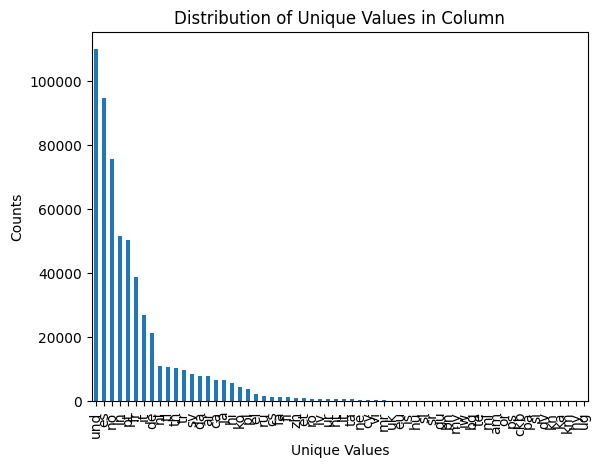

In [227]:
import matplotlib.pyplot as plt

value_counts = norway_tbcov[norway_tbcov['lang']
                            != 'en']['lang'].value_counts()
value_counts
value_counts.plot(kind='bar')
plt.title('Distribution of Unique Values in Column')
plt.xlabel('Unique Values')
plt.ylabel('Counts')
plt.show()

In [228]:
norway_tbcov[norway_tbcov['lang'] == 'no']['place_bounding_box'].isnull().sum()

73804

In [94]:
norway_tbcov.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685079 entries, 0 to 2685078
Data columns (total 37 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   tweet_id                               2685079 non-null  int64  
 1   date_time                              2685079 non-null  object 
 2   lang                                   2685079 non-null  object 
 3   user_id                                2685079 non-null  int64  
 4   retweeted_id                           1795989 non-null  float64
 5   quoted_id                              725471 non-null   float64
 6   in_reply_to_id                         248386 non-null   float64
 7   sentiment_conf                         2685079 non-null  float64
 8   sentiment_label                        2685079 non-null  int64  
 9   user_type                              2685079 non-null  object 
 10  gender_label                           135

In [107]:
norway_tbcov[norway_tbcov['lang'] == 'no'].info(verbose=True, show_counts=True)


<class 'pandas.core.frame.DataFrame'>
Index: 75678 entries, 1244 to 2685077
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tweet_id                               75678 non-null  int64  
 1   date_time                              75678 non-null  object 
 2   lang                                   75678 non-null  object 
 3   user_id                                75678 non-null  int64  
 4   retweeted_id                           23024 non-null  float64
 5   quoted_id                              16951 non-null  float64
 6   in_reply_to_id                         16255 non-null  float64
 7   sentiment_conf                         75678 non-null  float64
 8   sentiment_label                        75678 non-null  int64  
 9   user_type                              75678 non-null  object 
 10  gender_label                           50825 non-null  object 
 11  tw

In [241]:
norway_tbcov_lang_no = norway_tbcov[norway_tbcov['lang'] == 'no']
print(len(norway_tbcov_lang_no),
      norway_tbcov_lang_no['user_loc_city'].isnull().sum())
norway_tbcov_lang_no['user_loc_city'].value_counts()

75678 38060


user_loc_city
Oslo            28315
Trondheim        3542
Bergen           3050
Kristiansand     1095
Tromsø            995
Bodø              451
Stavanger         170
Name: count, dtype: int64

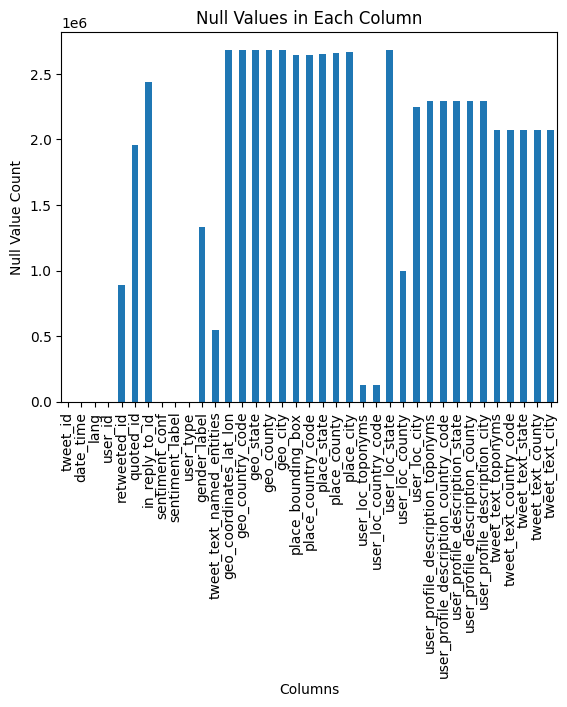

In [93]:
import matplotlib.pyplot as plt

null_counts = norway_tbcov.isnull().sum()

# Plotting
null_counts.plot(kind='bar')
plt.title('Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.show()

In [36]:
print(norway_tbcov.columns)

lat_lons_ids = norway_tbcov[norway_tbcov['geo_coordinates_lat_lon'].notna()]
city_ids = norway_tbcov[norway_tbcov['geo_city'].notnull()]
place_ids = norway_tbcov[norway_tbcov['place_city'].notnull()]
bb_ids = norway_tbcov[norway_tbcov['place_bounding_box'].notnull()]
lang_no = norway_tbcov[norway_tbcov['lang'] == 'no']
city_row = norway_tbcov[norway_tbcov['place_city'] == 'Bergen']

bb_ids['place_bounding_box']

Index(['tweet_id', 'date_time', 'lang', 'user_id', 'retweeted_id', 'quoted_id',
       'in_reply_to_id', 'sentiment_conf', 'sentiment_label', 'user_type',
       'gender_label', 'tweet_text_named_entities', 'geo_coordinates_lat_lon',
       'geo_country_code', 'geo_state', 'geo_county', 'geo_city',
       'place_bounding_box', 'place_country_code', 'place_state',
       'place_county', 'place_city', 'user_loc_toponyms',
       'user_loc_country_code', 'user_loc_state', 'user_loc_county',
       'user_loc_city', 'user_profile_description_toponyms',
       'user_profile_description_country_code',
       'user_profile_description_state', 'user_profile_description_county',
       'user_profile_description_city', 'tweet_text_toponyms',
       'tweet_text_country_code', 'tweet_text_state', 'tweet_text_county',
       'tweet_text_city'],
      dtype='object')


109        [[[99.960959, 9.703636], [99.960959, 9.80372],...
338        [[[10.491468, 59.809779], [10.491468, 60.13503...
629        [[[-115.209254, 35.984784], [-115.209254, 36.1...
872        [[[-4.99701, 37.664255], [-4.99701, 38.030946]...
901        [[[-107.536989, 53.357009], [-107.536989, 53.3...
                                 ...                        
2684874    [[[-78.818343, 35.715805], [-78.818343, 35.972...
2684875    [[[-58.502543, -34.705421], [-58.502543, -34.6...
2684891    [[[2.224101, 48.815521], [2.224101, 48.902146]...
2684896    [[[11.040893, 60.051741], [11.040893, 60.2559]...
2685036    [[[48.056399, 29.202787], [48.056399, 29.22521...
Name: place_bounding_box, Length: 43408, dtype: object

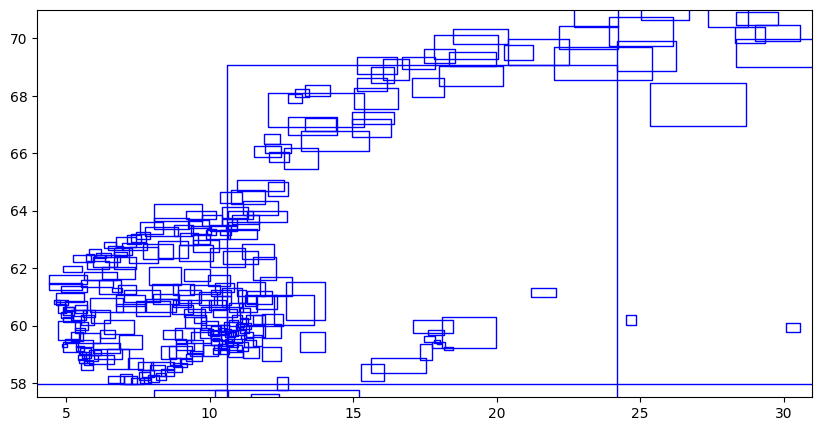

In [131]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import ast

bounding_boxes = bb_ids['place_bounding_box'].drop_duplicates()
bounding_boxes = [ast.literal_eval(bb) for bb in bounding_boxes]
polygons = [Polygon(bb[0]) for bb in bounding_boxes]

gdf = gpd.GeoDataFrame(geometry=polygons)

fig, ax = plt.subplots(figsize=(10, 10))
gdf.boundary.plot(ax=ax, color="blue", linewidth=1)

norway_bounds = {
    "min_lon": 4,
    "max_lon": 31,
    "min_lat": 57.5,
    "max_lat": 71
}

ax.set_xlim(norway_bounds['min_lon'], norway_bounds['max_lon'])
ax.set_ylim(norway_bounds['min_lat'], norway_bounds['max_lat'])

# Show the plot
plt.show()

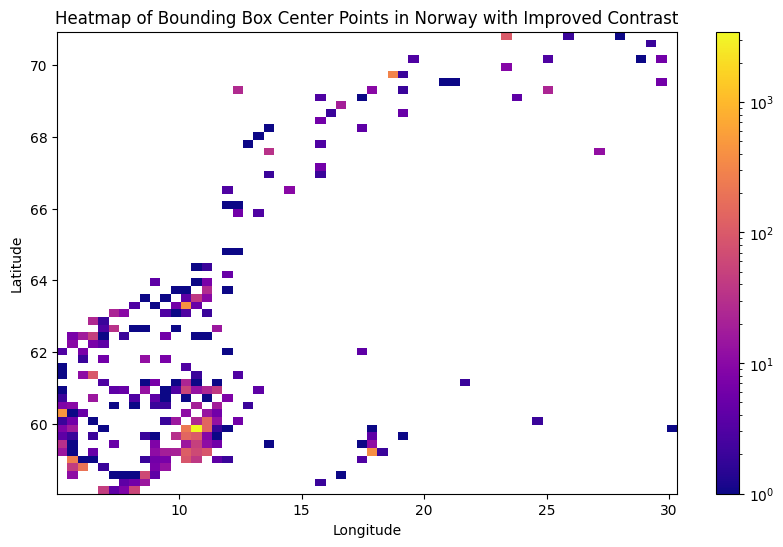

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

bounding_boxes_all = [ast.literal_eval(bb)
                      for bb in bb_ids['place_bounding_box']]

center_points = []
for bb in bounding_boxes_all:
    x_coords = [point[0] for point in bb[0]]
    y_coords = [point[1] for point in bb[0]]
    center_x = sum(x_coords) / len(x_coords)
    center_y = sum(y_coords) / len(y_coords)

    if (norway_bounds["min_lon"] <= center_x <= norway_bounds["max_lon"]) and \
       (norway_bounds["min_lat"] <= center_y <= norway_bounds["max_lat"]):
        center_points.append((center_x, center_y))

df = pd.DataFrame(center_points, columns=['Longitude', 'Latitude'])

# Heatmap
plt.figure(figsize=(10, 6))
heatmap, xedges, yedges = np.histogram2d(
    df['Longitude'], df['Latitude'], bins=(60, 60))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, extent=extent, origin='lower',
           cmap='plasma', aspect='auto', norm=LogNorm())

plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Bounding Box Center Points in Norway with Improved Contrast')
plt.show()

In [140]:
def is_in_norway(bounding_box):
    bounding_box = ast.literal_eval(bounding_box)
    x_coords = [point[0] for point in bounding_box[0]]
    y_coords = [point[1] for point in bounding_box[0]]
    center_x = sum(x_coords) / len(x_coords)
    center_y = sum(y_coords) / len(y_coords)

    return (norway_bounds['min_lon'] <= center_x <= norway_bounds['max_lon'] and
            norway_bounds['min_lat'] <= center_y <= norway_bounds['max_lat'])


norway_tbcov_bb_notna = norway_tbcov[norway_tbcov['place_bounding_box'].notna()]
tweets_in_norway = norway_tbcov_bb_notna[norway_tbcov_bb_notna['place_bounding_box'].apply(
    is_in_norway)]

tweets_in_norway['lang'].value_counts()

lang
en     5083
no     1841
und     557
es      217
da      180
tr       91
ar       89
in       81
sv       65
de       48
tl       44
pt       40
ne       33
pl       19
ro       16
it       15
ca       14
fr       12
fi       12
ru       10
et        9
th        8
nl        7
is        5
el        4
ht        4
cy        3
hi        3
hu        3
lt        3
sl        3
lv        2
eu        2
ur        1
zh        1
Name: count, dtype: int64

In [199]:
# tweets_with_lang_no = norway_tbcov_lang_no[['tweet_id']]
# tweets_with_lang_no['text'] = None

C:\Users\oskar\AppData\Local\Temp\ipykernel_27320\2105019669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_in_norway['text'] = None


In [262]:
from tqdm import tqdm
tqdm.pandas()

# chunk_size = 500
# total_rows = len(tweets_in_norway)

def chunker(seq, size):
    for pos in range(0, len(seq), size):
        yield seq.iloc[pos:pos + size]

def get_tweets(df, chunk_size=500):
    total_rows = len(df)
    start_chunk = 0
    
    chunks = chunker(df, chunk_size)
    for index, _ in enumerate(chunks):
        if index < start_chunk:
            continue

        print(f'Chunk {index}/{len(list(chunks))}')
        start = chunk_size * index
        end = min(chunk_size * (index + 1), total_rows)

        df.iloc[start:end, df.columns.get_loc('text')] = \
            df.iloc[start:end]['tweet_id'].progress_apply(
                get_tweet_text)

        if (tweets_in_norway.iloc[start:end]['text'].isnull().sum() > chunk_size - 10):
            print(f'Stopped working at chunk {index}')
            break

In [265]:
norway_tbcov_lang_no_cleaned = norway_tbcov_lang_no[['tweet_id', 'user_loc_city']].dropna()
norway_tbcov_lang_no_cleaned['text'] = None

total_rows = len(norway_tbcov_lang_no_cleaned)

chunk_size = 500
start_chunk = 0
chunks = chunker(norway_tbcov_lang_no_cleaned, chunk_size)
for index, _ in enumerate(chunks):
    if index < start_chunk:
        continue

    print(f'Chunk {index}/{len(list(chunks))}')
    start = chunk_size * index
    end = min(chunk_size * (index + 1), total_rows)

    norway_tbcov_lang_no_cleaned.iloc[start:end, norway_tbcov_lang_no_cleaned.columns.get_loc('text')] = \
        norway_tbcov_lang_no_cleaned.iloc[start:end]['tweet_id'].progress_apply(
            get_tweet_text)

    if (tweets_in_norway.iloc[start:end]['text'].isnull().sum() > chunk_size - 10):
        print(f'Stopped working at chunk {index}')
        break

Chunk 0/75


  0%|          | 0/500 [00:00<?, ?it/s]

  1%|          | 3/500 [00:00<00:29, 16.85it/s]

Couldn't get tweet: Internal Server Error


  1%|          | 5/500 [00:03<06:10,  1.33it/s]

Couldn't get tweet: Internal Server Error


  2%|▏         | 8/500 [00:04<04:41,  1.75it/s]

Couldn't get tweet: Internal Server Error


  2%|▏         | 12/500 [00:05<02:38,  3.08it/s]

Couldn't get tweet: Internal Server Error


  4%|▎         | 18/500 [00:05<01:14,  6.49it/s]

Couldn't get tweet: Internal Server Error


  4%|▍         | 22/500 [00:07<02:21,  3.37it/s]

Couldn't get tweet: Internal Server Error


  5%|▌         | 25/500 [00:09<02:55,  2.70it/s]

Couldn't get tweet: Internal Server Error


  7%|▋         | 35/500 [00:11<02:09,  3.60it/s]

Couldn't get tweet: Internal Server Error


  8%|▊         | 38/500 [00:13<02:40,  2.88it/s]

Couldn't get tweet: Internal Server Error


  8%|▊         | 41/500 [00:13<02:34,  2.97it/s]


Exception: Rate limit exceeded. Please try again later.

In [ ]:
city_coordinates = {
    'Oslo': ,            
    'Trondheim': ,        
    'Bergen': ,           
    'Kristiansand': ,     
    'Tromsø': ,            
    'Bodø': ,              
    'Stavanger': ,         
}

norway_tbcov_lang_no_cleaned.to_feather(
    '../norway_tbcov/norway_tbcov_lang_no_cleaned.feather')

In [203]:
# tweets_in_norway.to_feather('../norway_tbcov/tweets_in_norway.feather')

In [220]:
def get_center_point(bounding_box):
    x_coords = [point[0] for point in ast.literal_eval(bounding_box)[0]]
    y_coords = [point[1] for point in ast.literal_eval(bounding_box)[0]]
    center_lon = sum(x_coords) / len(x_coords)
    center_lat = sum(y_coords) / len(y_coords)
    return center_lat, center_lon


tweets_in_norway_cleaned = tweets_in_norway[['tweet_id', 'place_bounding_box', 'text', 'lang']]

result = tweets_in_norway_cleaned['place_bounding_box'].apply(get_center_point)
tweets_in_norway_cleaned['lat'] = result.apply(lambda x: x[0])
tweets_in_norway_cleaned['lon'] = result.apply(lambda x: x[1])

tweets_in_norway_cleaned = tweets_in_norway_cleaned.drop(columns=['place_bounding_box'])

tweets_in_norway.to_feather('../norway_tbcov/tweets_in_norway_cleaned.feather')

tweets_in_norway_cleaned

C:\Users\oskar\AppData\Local\Temp\ipykernel_27320\23006747.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_in_norway_cleaned['lat'] = result.apply(lambda x: x[0])
C:\Users\oskar\AppData\Local\Temp\ipykernel_27320\23006747.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_in_norway_cleaned['lon'] = result.apply(lambda x: x[1])


,tweet_id,text,lang,lat,lon
338,1223531434243174400,@KlasraRauf why don’t you to China and send a ...,en,59.972406,10.721526
1296,1223914066869133312,@zeinicienta Bolazo.,es,59.972406,10.721526
1453,1223938350387793920,Antiviral drugs are uncommon so why not?,en,69.710402,18.925812
2083,1224047595905069057,Kina forbyr shorting av aksjer pga Corona-viru...,no,59.972406,10.721526
4075,1224633711053942784,An absolute tragedy in a profusion of tragedie...,en,59.972406,10.721526
...,...,...,...,...,...
2683112,1377306476457426954,World leaders: - We need an international trea...,en,59.972406,10.721526
2683434,1377321756294283272,Offff,und,62.464714,6.311953
2683666,1377333237836521474,@croglegoom @DavidSommerseth @jonasali Hvordan...,no,70.706142,29.065419
2684774,1377386444910518278,@renee0467 @jilevin 4. George Floyd could have...,en,59.838370,10.447650


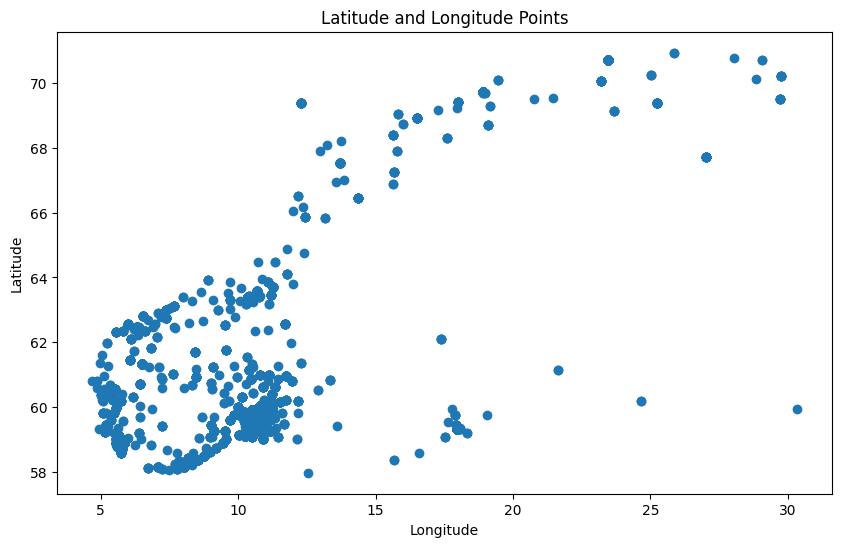

In [221]:
plt.figure(figsize=(10, 6))

# Plotting
plt.scatter(tweets_in_norway_cleaned['lon'], tweets_in_norway_cleaned['lat'])

# Adding titles and labels
plt.title('Latitude and Longitude Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [222]:
len(tweets_in_norway_cleaned)

8525